# Problem sheet 3
Hanne Hastedt (26014013), Jonas Lührs (23617618), Matteo Meier (21222337)

In [1]:
# necessary imports
import numpy as np
from scipy.io import loadmat
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt

## Exercise 3.1: Density estimation and countour plot.

In [2]:
# import the numpy array
mat = loadmat('data_points.mat')
data = mat['data']
print(f'The data is of type {type(data)} and has shape {data.shape}')

The data is of type <class 'numpy.ndarray'> and has shape (1000, 2)


In [3]:
# region and number of bins
rng = [-3, 3]
nBins = 100

# bandwidth multiplied with 5 for smoother estimation
kWidth = (rng[1] - rng[0]) / nBins * 5

# meshgrid
xGrid = rng[0] + (rng[1] - rng[0]) * (np.arange(nBins) + 0.5) / nBins 
XGrid, YGrid = np.meshgrid(xGrid, np.flip(xGrid))
XYGrid = np.stack((XGrid.ravel(), YGrid.ravel())).transpose()

# gaussian kernel density estimation
kde = KernelDensity(kernel='gaussian', bandwidth=kWidth).fit(data)
log_dens = kde.score_samples(XYGrid)
dens_estm = np.exp(log_dens).reshape((nBins,nBins))

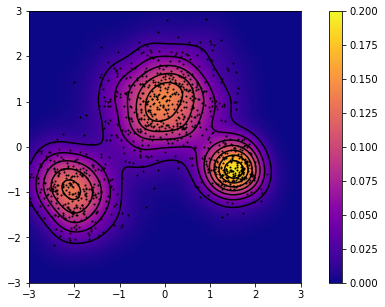

In [4]:
# plotting
fig = plt.subplots(figsize=(10,5))
plt.scatter(data[:,0], data[:,1], s=1, c='k')
ax = plt.gca()
shw = ax.imshow(dens_estm, extent=rng+rng, cmap='plasma', vmin=0, vmax=0.2)
bar = plt.colorbar(shw) 
ax.contour(dens_estm, colors='k', origin='image', extent=rng+rng)
plt.show()

## Exercise 3.2: Smoking and life expectancy.

In [5]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors

### Task 1: Import data

In [6]:
#load data
data_smokers = loadmat('data_smokers.mat')
#extract values from dictionary
smokers_ar = data_smokers['data']

In [7]:
smokers_ar

array([[19,  0, 87],
       [ 8,  0, 77],
       [ 8,  0, 66],
       ...,
       [14,  0, 54],
       [ 2,  0, 77],
       [14,  1, 45]])

### Task 2: Plot histograms over ages

In [8]:
#data non-smokers
idx_nonSmoker = np.where(smokers_ar[:, 1]==0)
age_nonSmoker = smokers_ar[idx_nonSmoker][:, 2]

In [9]:
#data smokers
idx_smoker = np.where(smokers_ar[:, 1]==1)
age_smoker = smokers_ar[idx_smoker][:, 2]

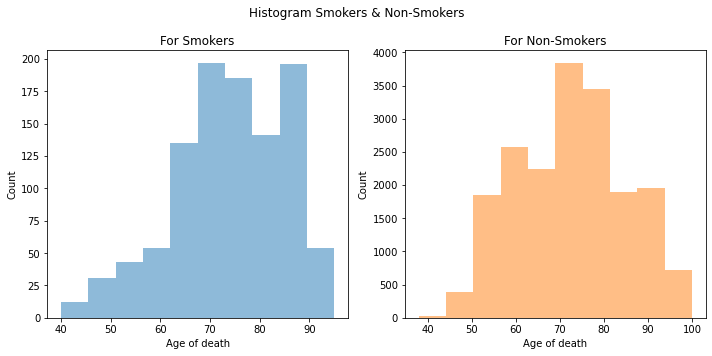

In [10]:
#plot histogram with absolute values
fig, ax = plt.subplots(1, 2, tight_layout=True, figsize=(10,5))
plt.suptitle('Histogram Smokers & Non-Smokers')
ax[0].hist(age_smoker, color='#1f77b4', alpha=0.5)
ax[1].hist(age_nonSmoker, color='#ff7f0e', alpha=0.5)
titles = ['Smokers', 'Non-Smokers']
for i in range(2):
    ax[i].set_xlabel('Age of death')
    ax[i].set_ylabel('Count')
    ax[i].set_title('For ' + titles[i])
plt.show()

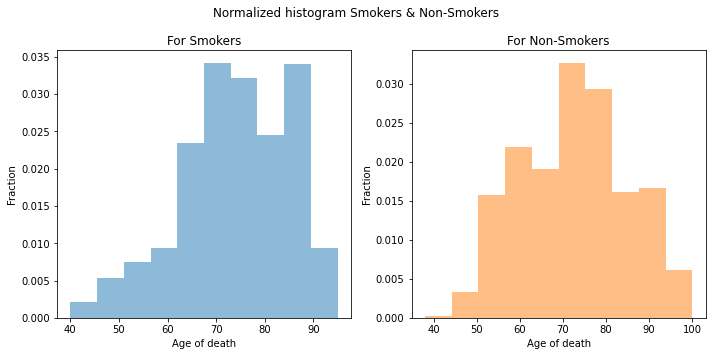

In [11]:
#plot histogram with relative values
fig, ax = plt.subplots(1, 2, tight_layout=True, figsize=(10,5))
plt.suptitle('Normalized histogram Smokers & Non-Smokers')
ax[0].hist(age_smoker, density=True, color='#1f77b4', alpha=0.5)
ax[1].hist(age_nonSmoker, density=True, color='#ff7f0e', alpha=0.5)
titles = ['Smokers', 'Non-Smokers']
for i in range(2):
    ax[i].set_xlabel('Age of death')
    ax[i].set_ylabel('Fraction')
    ax[i].set_title('For ' + titles[i])
plt.show()

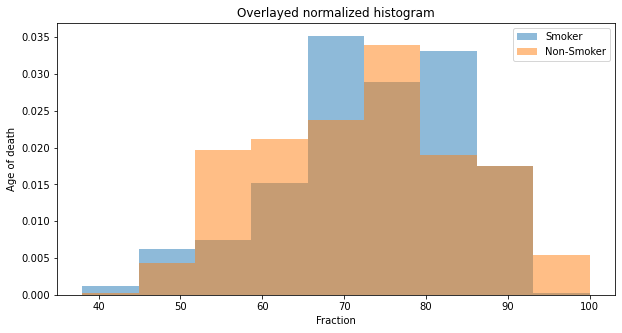

In [12]:
#plot with shared bins
bins = np.linspace(min(age_nonSmoker),max(age_nonSmoker), 10)

#bins = [35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
plt.figure(figsize=(10,5))
plt.hist(age_smoker, bins, alpha=0.5, label='Smoker', density=True)
plt.hist(age_nonSmoker, bins, alpha=0.5, label='Non-Smoker', density=True)
plt.xlabel('Fraction')
plt.ylabel('Age of death')
plt.legend(loc='upper right')
plt.title("Overlayed normalized histogram")
plt.show()

#### Plot description
The normalized and non-normalized histograms both show, that there is one peak for age of death for non-smokers around 70 to 80 years. On the other hand the age of death for smokers seems to vary more and doesn't show one clear peak.
Another observation is that while the last bin reaches 100 years for the non-smokers, that is not the case for the smokers. Here the last bin only reaches to 95 years.
It´s suprising to observe in the overlayed histogram plot that for the ages of 53 to 66 non-smokers have a much higher death rate than smokers. 

### Task 3: Visualize average life expectancy and fraction of smokers

In [13]:
countries = []
for i in range(20):
    idx_country = np.where(smokers_ar[:, 0]==i)
    countries.append(smokers_ar[idx_country])

In [14]:
life_expectancy = []
fraction_smokers = []
for i in range(20):
    #life expectancy is average of age when dying
    life_expectancy.append(np.mean(countries[i][:, 2]))
    #fraction smokers
    nrSmokers = sum(countries[i][:, 1])
    fraction_smokers.append(nrSmokers/len(countries[i]))

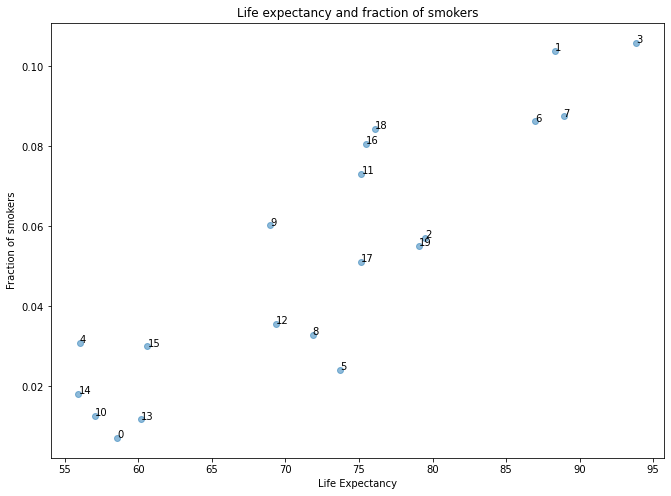

In [15]:
#plot the information
fig, ax = plt.subplots(figsize=(11,8))
plt.title('Life expectancy and fraction of smokers')
ax.scatter(life_expectancy, fraction_smokers, alpha=.5)
ax.set_xlabel('Life Expectancy')
ax.set_ylabel('Fraction of smokers')
for i in range(20):
    ax.annotate(i, (life_expectancy[i], fraction_smokers[i]))

#### Plot description
For this task we decided to use a scatterplot since we are interested in the relationship of a countries life expectancy and its fraction of smokers. This means we are dealing with two quantitative and one categorical variable. A scatterplot is a perfect fit in this case since the axes can be represented by the quantitative variables while the categorical variable country can be shown through direct labeling. Using direct labeling for each dot in the plot is only feasible since the data on hand is not heavily clustered.

On an additional note to the scatterplot, one might at first be suprised that countries with a higher fraction of smokers have a higher life expectancy. The explanation for this might be that in richer countries (where there is better health care and smaller death rate) more people tend to smoke, but live on average still longer than people from countries with worse living conditions (e.g. no or little health care). So this visualization is a case where one has to be cautious and where the relationship depicted might not tell the full (or true) story.

### Task 4: Visualize life expectancy

In [16]:
le_smoker = []
le_nonSmoker = []
smokers_matrix = []
nonSmokers_matrix = []
for i in range(len(countries)):
    le_nonSmoker.append(np.mean(countries[i][np.where(countries[i][:, 1]==0), 2])) # life expactancy of nonsmokers
    nonSmokers_matrix.append(countries[i][np.where(countries[i][:, 1]==0)]) #already for task 5: have lists for smoker and non-smoker sorted by country
    le_smoker.append(np.mean(countries[i][np.where(countries[i][:, 1]==1), 2]))
    smokers_matrix.append(countries[i][np.where(countries[i][:, 1]==1)])

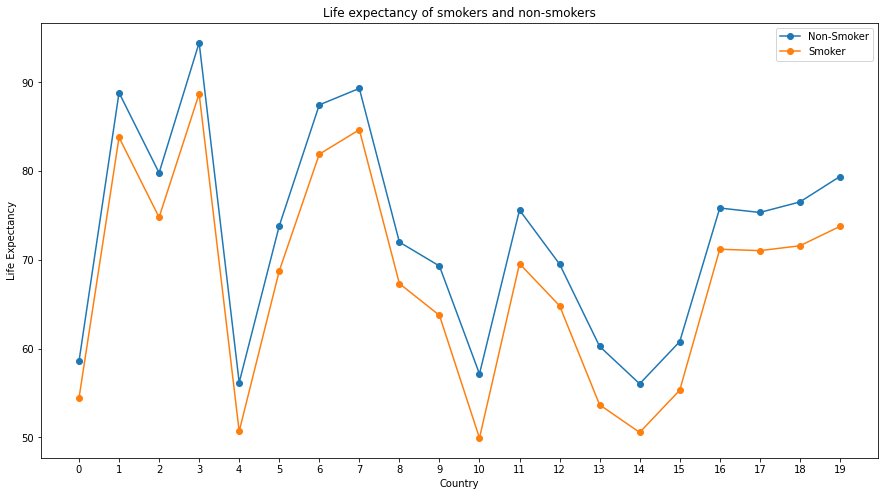

In [17]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Life expectancy of smokers and non-smokers')
ax.plot(le_nonSmoker, 'o-')
ax.plot(le_smoker, 'o-')
plt.legend(['Non-Smoker', 'Smoker'])
ax.set_xlabel('Country')
ax.set_xticks([i for i in range(20)])
ax.set_ylabel('Life Expectancy')
plt.show()

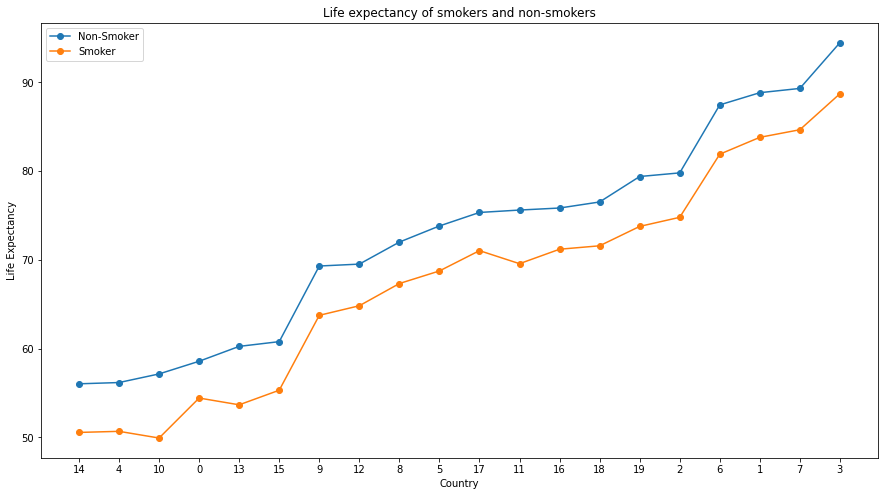

In [18]:
import pandas as pd
c = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19']
df = pd.DataFrame({'c':c, 'le_nonSmoker':le_nonSmoker, 'le_smoker':le_smoker})
# sort countries according to life expectancy
df = df.sort_values(by=['le_nonSmoker'])

fig, ax = plt.subplots(figsize=(15,8))
plt.title('Life expectancy of smokers and non-smokers')
ax.plot('c', 'le_nonSmoker', data=df, marker='o')
ax.plot('c', 'le_smoker', data=df, marker='o')
plt.legend(['Non-Smoker', 'Smoker'])
ax.set_xlabel('Country')
ax.set_ylabel('Life Expectancy')
plt.show()

#### Plot description
Here we decided to use the lineplot with printed points for each country. Even though we noted, that the linking of the points might be seen as not ideal since there is not a real relationship between the countries for the task at hand. However, the advantage of this way to visualize the data are stronger:
- Firstly, only showing the points without connecting lines is confusing and doesn't show any kind of trend or connection (unless one takes a long time to try and figure it out)
- Secondly, the aim of this plot was to have a look at the life expectancy of smokers and non smokers. Due to the two lines the viewer can easily see, that the life expectancy of smokers is on average smaller than the life expectancy for non smokers (without an exception)
- Furthermore the dots put emphasizes on the life expectancy for the each country at the same time decreasing the importance of the lines for the interpretation of this plot.
- Plotting the countries ordered according to their life expectancy makes the plot easier for the eyes of the reader

### Task 5: Generate 2d histogram

In [19]:
#ordering of countries based on life expactancy of whole population starting with the lowest life expectancy
sort_idx = np.argsort(life_expectancy)
smokers = smokers_ar[idx_smoker]
nonSmokers = smokers_ar[idx_nonSmoker]

In [20]:
#Non Smokers
rng_ns = [[0, 19], [min(nonSmokers[:, 2]), max(nonSmokers[:, 2])]]
hist_ns,edgesX,edgesY=np.histogram2d(nonSmokers[:, 0], nonSmokers[:, 2], bins=[20, [i for i in range(40, 100, 2)]], range=rng_ns, density=True)
ordered_hist_ns = np.array([hist_ns[idx] for idx in sort_idx]).transpose() #sort histogram by life expectancy (increasing) and transpose for vosialuiztaion purposes (since histogram2d does not follow cartesian conventions)

In [21]:
#Smokers
rng_s = [[0, 19], [min(smokers[:, 2]), max(smokers[:, 2])]]
hist_s,edgesX,edgesY=np.histogram2d(smokers[:, 0], smokers[:, 2], bins=[20, [i for i in range(40, 100, 2)]], range=rng_s, density=True)
ordered_hist_s = np.array([hist_s[idx] for idx in sort_idx]).transpose() #sort histogram by life expectancy (increasing) and transpose for vosialuiztaion purposes (since histogram2d does not follow cartesian conventions)

In [22]:
#create new image so we can later put the two histograms in two different color channels
img = np.zeros((hist_s.shape[1], hist_s.shape[0], 3)) #*3 because of RGB
img[:, :, 0] = ordered_hist_ns
img[:, :, 2] = ordered_hist_s

In [23]:
#Normlization of the color channels
max_val = np.max(img)
min_val = np.min(img)
img_norm = (img-min_val)/(max_val-min_val)

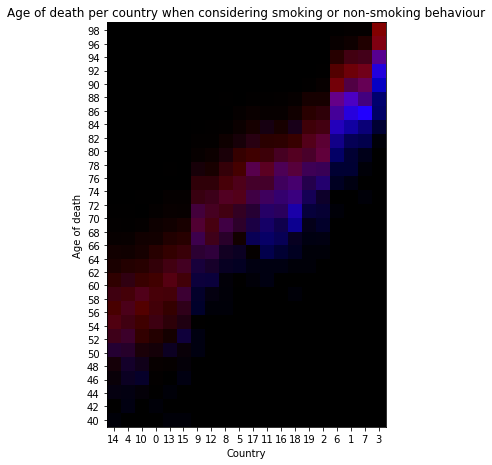

In [24]:
fig, ax = plt.subplots(figsize=(5, 10))
plt.imshow(img_norm, origin="lower")
ax.set_xticks([i for i in range(20)])
ax.set_xticklabels(sort_idx)
ax.set_yticks(ticks = np.linspace(start=0, stop=27.93, num=int(len(edgesY))))
ax.set_yticklabels([str(i) for i in range(40, 100, 2)])
ax.set_xlabel('Country')
ax.set_ylabel('Age of death')
plt.title('Age of death per country when considering smoking or non-smoking behaviour')
plt.show()

#### Plot description
In this visualization red represents people who do not smoke where as blue depicts the opposite. One can see that smoking makes a difference especially in countries, that have a high life expectancy whereas for countries with lower life expectancy it doesn't show such a significant difference. This might be due to countries with lower life expectancies having in general worse living conditions resulting in people dying before the drastically negative side effects of smoking show (as discussed earlier). 

### Task 6: Visualize relation country to age

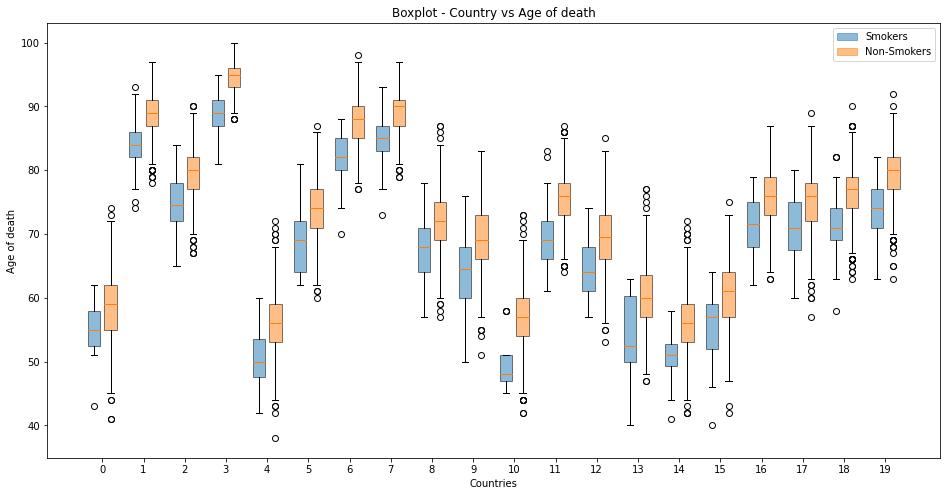

In [25]:
import matplotlib.patches as mpatches

smokers_ages = []
for i in range(len(countries)):
    smokers_ages.append(smokers_matrix[i][:, 2])
    
nonSmokers_ages = []
for i in range(len(countries)):
    nonSmokers_ages.append(nonSmokers_matrix[i][:, 2])
    
plt.figure(figsize=(16,8))
bplot_smoker = plt.boxplot(smokers_ages,positions=np.arange(len(smokers_ages))-0.2, widths=0.3, patch_artist=True, manage_ticks=False)
bplot_nonSmoker = plt.boxplot(nonSmokers_ages, positions=np.arange(len(nonSmokers_ages))+0.2, widths=0.3, patch_artist=True, manage_ticks=False)
plt.title("Boxplot - Country vs Age of death")
plt.xlabel("Countries")
plt.ylabel("Age of death")

#set color of boxplots
for i in range(len(countries)):
    for patch in bplot_smoker['boxes']:
        patch.set_facecolor('#1f77b4')
        patch.set_alpha(0.5)
    for patch in bplot_nonSmoker['boxes']:
        patch.set_facecolor('#ff7f0e')
        patch.set_alpha(0.5)

leg_smoker = mpatches.Patch(color='#1f77b4', alpha=0.5, label='Smokers')
leg_nonSmoker = mpatches.Patch(color='#ff7f0e', alpha=0.5, label='Non-Smokers')
plt.legend(handles=[leg_smoker,leg_nonSmoker])
plt.xticks(np.arange(0, 20, 1))
plt.show()

#### Plot description
The goal of this task was to visualize in one plot the variation of ages across different countries for both groups (smokers and non-smokers). Therefore, we have chosen boxplots to represent the stochastic functional relation of 'country that a person lived in' to 'age of that person'. For each country two boxplots are plotted representing the two groups. These two boxplots are further distinguished by color for a better differentiation of the two groups.

As the plot in task 4 has already shown, the mean values of the boxplots belonging to the non-smoker group are always higher than those of the smoker group.